<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_date        7059 non-null   object 
 1   address          6411 non-null   object 
 2   lot              7059 non-null   object 
 3   property_type    6184 non-null   object 
 4   rooms            7059 non-null   int64  
 5   floor            6018 non-null   object 
 6   square_meters    7055 non-null   float64
 7   price            6558 non-null   float64
 8   difference_rate  0 non-null      float64
 9   latitude         5588 non-null   float64
 10  longitude        5588 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 606.8+ KB
None
    sale_date        address           lot    property_type  rooms      floor  \
0  16.01.2026     ילין דוד 9   6213-819-13              NaN      2     שלישית   
1  06.10.2025       שטריקר 8    6212-365-2             דירה     

C:\Users\mordr\AppData\Local\Temp\ipykernel_33116\1349022824.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


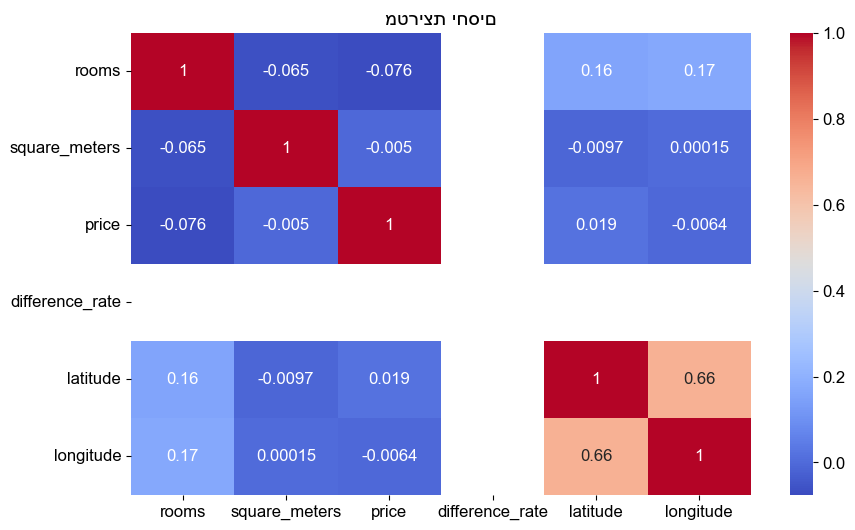

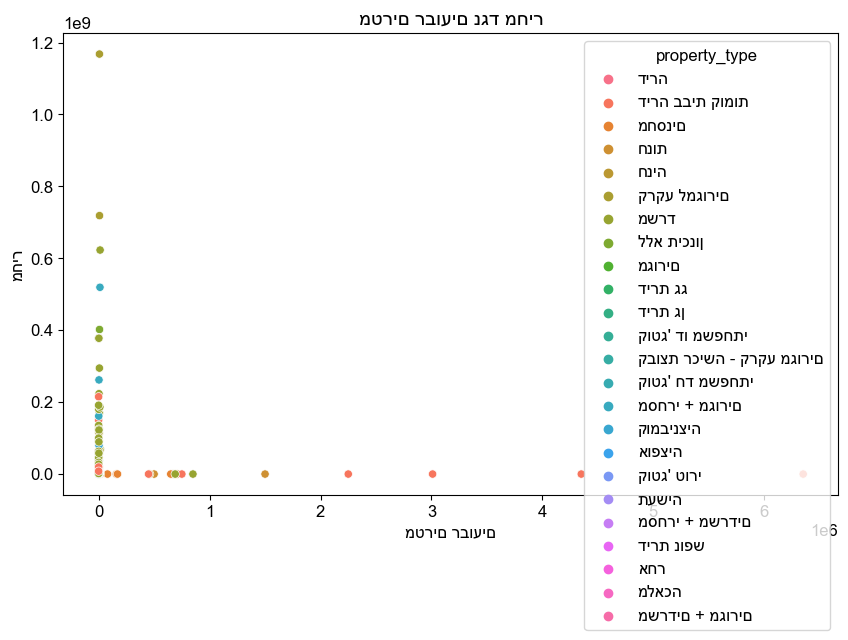

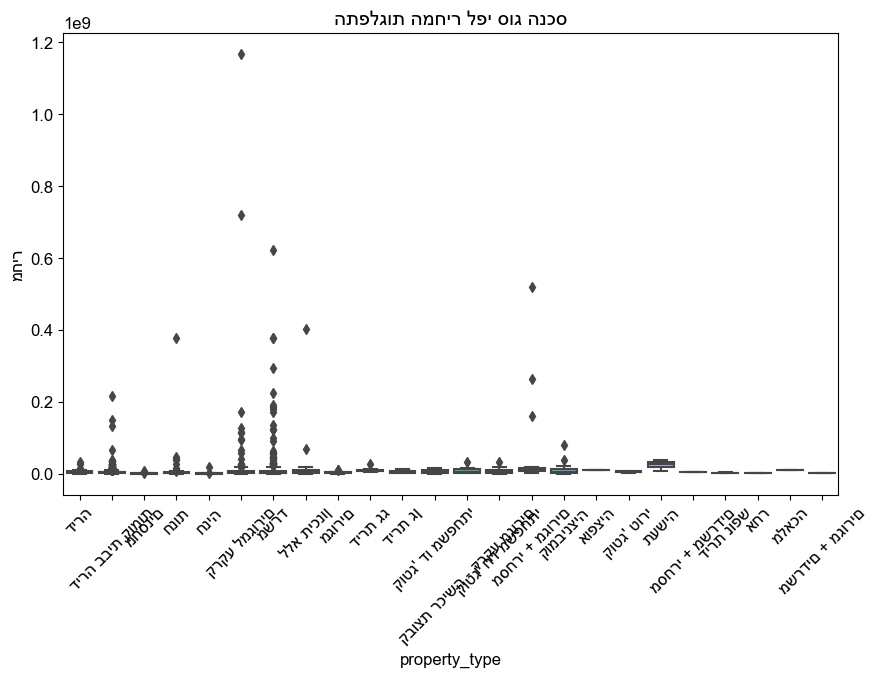

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# // this isnt C++ nor C# 
# // First step in ML is Data exploration and Data preprocessing, depending on what is our Clasification Problem is we need to figure out what data we can use and why we want to use it..... :) 
# Load the CSV file into a Pandas DataFrame
data = pd.read_csv("SoldPropertiesData.csv")

# Set Hebrew font for matplotlib
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Display basic information about the dataset
print(data.info())
print(data.head())
print(data.describe())


# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("מטריצת יחסים")
plt.show()

# Scatter plot of square meters vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="square_meters", y="price", hue="property_type")
plt.title("מטרים רבועים נגד מחיר")
plt.xlabel("מטרים רבועים")
plt.ylabel("מחיר")
plt.show()

# Box plot of price by property type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="property_type", y="price")
plt.title("התפלגות המחיר לפי סוג הנכס")
plt.xticks(rotation=45)
plt.ylabel("מחיר")
plt.show()

# the Hebrew require additional Python Libraries, i couldnt find the way to 
# dipaly it proparly, but its just playing around with the data  :) GL //



In [7]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv("SoldPropertiesData.csv")

# Drop rows with missing coordinates
data = data.dropna(subset=['latitude', 'longitude'])

# Randomly select 4000 samples
random_samples = data.sample(n=4000, random_state=42)

# Extract coordinates for selected samples
coordinates = random_samples[['latitude', 'longitude']].values

# Calculate the 100 nearest neighbors for each point
n_neighbors = 100
neighbors = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(coordinates)
distances, indices = neighbors.kneighbors(coordinates)

# Calculate averages for the selected samples' nearest neighbors
averages = []
for i, sample in enumerate(random_samples.iterrows()):
    neighbor_indices = indices[i, 1:]  # Skip the first index, which is the sample itself
    neighbor_data = data.iloc[neighbor_indices]
    avg_rooms = neighbor_data['rooms'].mean()
    avg_floor = pd.to_numeric(neighbor_data['floor'], errors='coerce').mean()  # Convert to numeric
    avg_price = neighbor_data['price'].mean()
    averages.append({'avg_rooms': avg_rooms, 'avg_floor': avg_floor, 'avg_price': avg_price})

# Add average values to the DataFrame
random_samples = random_samples.assign(**pd.DataFrame(averages))

# Display the DataFrame with added averages
random_samples


,sale_date,address,lot,property_type,rooms,floor,square_meters,price,difference_rate,latitude,longitude,avg_rooms,avg_floor,avg_price
5198,21.03.2022,טשרניחובסקי 5,7226-15-15,דירה בבית קומות,4,חמישית,96.56,7604000.0,NaN,32.071327,34.770547,NaN,NaN,NaN
3779,06.06.2022,העבודה 8,6933-6-4,דירה בבית קומות,2,שניה,58.00,4850000.0,NaN,32.070592,34.772567,2.989899,NaN,4.195533e+06
100,30.04.2023,אחימעץ 24,6135-339-2,דירה בבית קומות,5,קרקע,95.71,3210000.0,NaN,32.048229,34.796120,2.767677,NaN,4.849366e+06
212,03.04.2023,רמז דוד 28,6213-1273-9,דירה בבית קומות,3,שלישית,56.00,4550000.0,NaN,32.088275,34.786459,2.767677,NaN,5.484385e+06
582,07.02.2023,קרליבך 4,7104-289-619,דירה בבית קומות,5,שבע עשרה,141.00,8000000.0,NaN,32.067257,34.783675,2.878788,NaN,4.378415e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,03.02.2022,נחל הבשור 6,7074-53-20,דירה בבית קומות,3,שלישית,43.00,1800000.0,NaN,32.038828,34.756753,NaN,NaN,NaN
527,15.02.2023,הר ציון 113,6971-24-2,דירה בבית קומות,2,שניה,50.00,2200000.0,NaN,32.049997,34.773829,2.909091,NaN,1.054008e+07
5216,21.03.2022,אהרונסון 8,6916-40-1,קומבינציה,0,NaN,25000000.00,NaN,NaN,32.071020,34.764726,NaN,NaN,NaN
7034,02.01.2022,אלון יגאל 94,7095-77-33,משרד,0,שלושים ותשע,613.00,32402000.0,NaN,32.069018,34.794109,NaN,NaN,NaN


In [9]:
print(averages)

[{'avg_rooms': 2.98989898989899, 'avg_floor': nan, 'avg_price': 4632379.742268041}, {'avg_rooms': 2.98989898989899, 'avg_floor': nan, 'avg_price': 4765923.776595744}, {'avg_rooms': 2.757575757575758, 'avg_floor': nan, 'avg_price': 4093841.042105263}, {'avg_rooms': 2.7777777777777777, 'avg_floor': nan, 'avg_price': 4479448.387096774}, {'avg_rooms': 2.8282828282828283, 'avg_floor': nan, 'avg_price': 4120868.5376344086}, {'avg_rooms': 2.8686868686868685, 'avg_floor': nan, 'avg_price': 5106929.172043011}, {'avg_rooms': 2.8484848484848486, 'avg_floor': nan, 'avg_price': 4395061.315217392}, {'avg_rooms': 3.0202020202020203, 'avg_floor': nan, 'avg_price': 3951685.734042553}, {'avg_rooms': 3.080808080808081, 'avg_floor': nan, 'avg_price': 5946677.612903226}, {'avg_rooms': 2.9797979797979797, 'avg_floor': nan, 'avg_price': 5561200.691489362}, {'avg_rooms': 2.888888888888889, 'avg_floor': nan, 'avg_price': 4221788.76344086}, {'avg_rooms': 2.7474747474747474, 'avg_floor': nan, 'avg_price': 410182

In [29]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv("SoldPropertiesData.csv")

# Drop rows with missing coordinates and square meters
data = data.dropna(subset=['latitude', 'longitude', 'square_meters'])

# Define latitude and longitude ranges for each section
sections = {
    'North': {'latitude_range': (32.1, 32.15), 'longitude_range': (34.75, 34.8)},
    'Midtown': {'latitude_range': (32.05, 32.1), 'longitude_range': (34.75, 34.8)},
    'South': {'latitude_range': (32.0, 32.05), 'longitude_range': (34.75, 34.8)},
    'West': {'latitude_range': (32.0, 32.15), 'longitude_range': (34.7, 34.75)}
}

# Initialize a list to store section data
section_data_list = []

# Iterate over each section
for section_name, section_range in sections.items():
    section_latitude_range = section_range['latitude_range']
    section_longitude_range = section_range['longitude_range']

    # Filter data points within the section's latitude and longitude range
    section_data = data[
        (data['latitude'].between(*section_latitude_range)) &
        (data['longitude'].between(*section_longitude_range))
    ]

    # Calculate average price, room number, and square meters for the section's samples
    num_samples_per_section = min(len(section_data), 4000 // len(sections))
    section_samples = section_data.sample(n=num_samples_per_section, random_state=42)

    avg_price = section_samples['price'].mean()
    avg_rooms = section_samples['rooms'].mean()
    avg_square_meters = section_samples['square_meters'].mean()

    section_data_list.append({
        'Section': section_name,
        'Num_Samples': len(section_samples),
        'Avg_Price': avg_price,
        'Avg_Rooms': avg_rooms,
        'Avg_Square_Meters': avg_square_meters
    })

# Create a DataFrame from the section data list
section_averages_df = pd.DataFrame(section_data_list)
print(section_averages_df)


   Section  Num_Samples     Avg_Price  Avg_Rooms  Avg_Square_Meters
0    North          392  5.191518e+06   3.818878       2.793548e+04
1  Midtown         1000  6.252143e+06   2.627000       1.056498e+06
2    South          668  2.868429e+06   3.046407       4.573307e+04
3     West          122  2.842026e+06   2.885246       1.695316e+04
